<a href="https://colab.research.google.com/github/AvaIruk/Ava-Ilkhani/blob/main/NC_Ava_ilkhani.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Computing project 
comparision of MLP Vs SVM on NBA Dataset

In [ ]:
# import required libraries
import numpy as np
import scipy
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from itertools import cycle
import skorch
from skorch import NeuralNetClassifier
from skorch.callbacks import EpochScoring
from sklearn.metrics import auc
from skorch.callbacks import EarlyStopping


In [ ]:
# Loading dataset
df_nba = pd.read_csv ('nba_logreg.csv')
df_nba

# Reference : https://datatofish.com/read_excel/

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [ ]:
# Renaming the last column
df_nba.rename(columns = {'TARGET_5Yrs':'TARGET'}, inplace = True)
df_nba

# Reference - https://www.statology.org/pandas-rename-columns/

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0.0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0.0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0.0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1.0
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0.0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1.0
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0.0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1.0


In [ ]:
# Converting the TARGET column in to integer
df_nba.TARGET = df_nba.TARGET.astype(int)
df_nba
# https://stackoverflow.com/questions/21291259/convert-floats-to-ints-in-pandas

,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1335,Chris Smith,80,15.8,4.3,1.6,3.6,43.3,0.0,0.2,14.3,...,1.5,79.2,0.4,0.8,1.2,2.5,0.6,0.2,0.8,0
1336,Brent Price,68,12.6,3.9,1.5,4.1,35.8,0.1,0.7,16.7,...,1.0,79.4,0.4,1.1,1.5,2.3,0.8,0.0,1.3,1
1337,Marlon Maxey,43,12.1,5.4,2.2,3.9,55.0,0.0,0.0,0.0,...,1.6,64.3,1.5,2.3,3.8,0.3,0.3,0.4,0.9,0
1338,Litterial Green,52,12.0,4.5,1.7,3.8,43.9,0.0,0.2,10.0,...,1.8,62.5,0.2,0.4,0.7,2.2,0.4,0.1,0.8,1


In [ ]:
# Checking for null values
print(df_nba.isnull().sum())

# Reference : https://note.nkmk.me/en/python-pandas-nan-judge-count/

Name        0
GP          0
MIN         0
PTS         0
FGM         0
FGA         0
FG%         0
3P Made     0
3PA         0
3P%        11
FTM         0
FTA         0
FT%         0
OREB        0
DREB        0
REB         0
AST         0
STL         0
BLK         0
TOV         0
TARGET      0
dtype: int64


In [ ]:
# Fill missing value with fillna 
# 1340 rows × 21 columns  
df_nba1 = df_nba.fillna(0)
print(df_nba1.isnull().sum())
# Reference : https://www.geeksforgeeks.org/working-with-missing-data-in-pandas/#:~:text=In%20order%20to%20check%20null%20values%20in%20Pandas,the%20rows%20having%20Gender%20%3D%20NULL%20are%20displayed.

Name       0
GP         0
MIN        0
PTS        0
FGM        0
FGA        0
FG%        0
3P Made    0
3PA        0
3P%        0
FTM        0
FTA        0
FT%        0
OREB       0
DREB       0
REB        0
AST        0
STL        0
BLK        0
TOV        0
TARGET     0
dtype: int64


In [ ]:
# Applying label encoder to the Name column
import time
startTime = time.time()
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df_nba1['Name'] = label_encoder.fit_transform(df_nba1['Name'])
df_nba1
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
# Reference : https://stackoverflow.com/questions/50258960/how-to-apply-labelencoder-for-a-specific-column-in-pandas-dataframe

Execution time in seconds: 0.005996227264404297


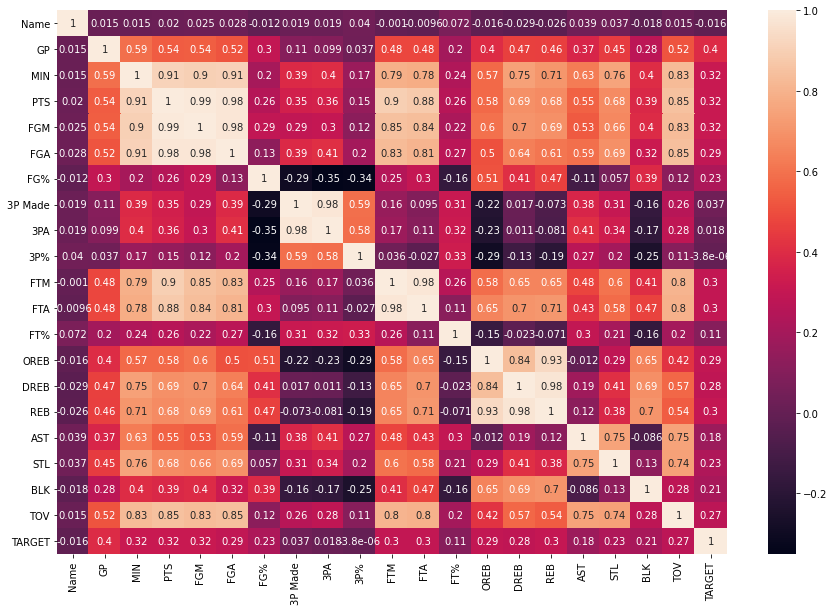

In [ ]:
# correlation matrix
 
# Correlation Matrix formation
corr_matrix = df_nba1.loc[:].corr()
 
#Using heatmap to visualize the correlation matrix
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
# Checking the counts of class
df_nba1['TARGET'].value_counts()

#  Reference : https://pandas.pydata.org/docs/reference/api/pandas.Series.value_counts.html

1    831
0    509
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

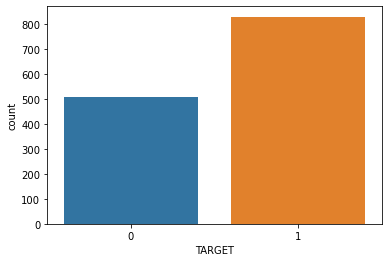

In [ ]:
# Check if the class is balanced or not
sns.countplot(x ='TARGET', data = df_nba1)

# Reference : https://www.geeksforgeeks.org/countplot-using-seaborn-in-python/

In [ ]:
# Splitting the data
X = df_nba1.iloc[:, :-1]
y = df_nba1.iloc[:, -1]
y=y.astype('int')

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state=0)

# Reference : https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/

In [ ]:
import sklearn.metrics

In [ ]:
# Applying SMOTE for balance data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)

X_sm, y_sm = sm.fit_resample(X, y)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_sm.shape}''')

print('\nBalance of positive and negative classes (%):')
y_sm.value_counts(normalize=True) * 100

# Reference : https://towardsdatascience.com/how-to-effortlessly-handle-class-imbalance-with-python-and-smote-9b715ca8e5a7

Shape of X before SMOTE: (1340, 20)
Shape of X after SMOTE: (1662, 20)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: TARGET, dtype: float64

In [ ]:
# resplitting the data

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, train_size = 0.8, random_state=0)

# Reference : https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/

In [ ]:
# create svm baseline model
import time
startTime = time.time()
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0, probability=True)

#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred_svm = classifier.predict(X_test)
executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
# Reference : T7 with gaps

Execution time in seconds: 407.97702288627625


In [ ]:
# Print confusion matrix, accuracy and standard deviation
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)

plt.show()

# Reference : T7 with gaps

[[117  46]
 [ 64 106]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_svm = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 3)

print("Accuracy: {:.2f} %".format(accuracies_svm.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm.std()*100))
# Reference : T7 with gaps

Accuracy: 69.60 %
Standard Deviation: 1.88 %


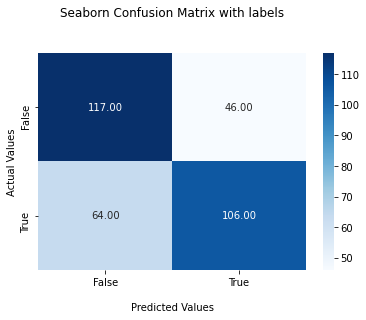

In [ ]:
# Plotting the confusion matrix for the baseline svm model

ax = sns.heatmap(cm_svm, annot=True, cmap='Blues',fmt = '.2f')
ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Reference : https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [ ]:
# Print classification report of baseline SVM model
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.72      0.68       163
           1       0.70      0.62      0.66       170

    accuracy                           0.67       333
   macro avg       0.67      0.67      0.67       333
weighted avg       0.67      0.67      0.67       333



In [ ]:
# SVM grid search
# defining parameter range
param_grid = {'C': [0.1, 1, 10],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 
svm_grid_search = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
svm_grid_search.fit(X_train, y_train)

# Reference : https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.2s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.2s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.504 total time=   0.1s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.500 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.502 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.504 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=3)

In [ ]:
# Print best parameter after tuning
print(svm_grid_search.best_params_)
 
# Print how our model looks after hyper-parameter tuning
print(svm_grid_search.best_estimator_)

# Reference : https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1, gamma=0.01)


In [ ]:
import time
startTime = time.time()

from sklearn.svm import SVC
classifier_final = SVC(kernel = 'rbf',C=1, gamma=0.01, random_state = 0, probability=True)
#Fit the model for the data

classifier_final.fit(X_train, y_train)

#Make the prediction
y_pred_svm_final = classifier_final.predict(X_test)

executionTime = (time.time() - startTime)
print('Execution time in seconds: ' + str(executionTime))
# Reference : T7 with gaps

Execution time in seconds: 1.4401795864105225


In [ ]:
# Print classification report of final SVM model
print(classification_report(y_test, y_pred_svm_final))

# Reference : https://www.geeksforgeeks.org/svm-hyperparameter-tuning-using-gridsearchcv-ml/

              precision    recall  f1-score   support

           0       0.82      0.65      0.73       163
           1       0.72      0.86      0.79       170

    accuracy                           0.76       333
   macro avg       0.77      0.76      0.76       333
weighted avg       0.77      0.76      0.76       333



In [ ]:
# Print confusion matrix, accuracy and standard deviation
cm_svm_final = confusion_matrix(y_test, y_pred_svm_final)
print(cm_svm_final)

# Reference : T7 with gaps

[[106  57]
 [ 23 147]]


In [ ]:
from sklearn.model_selection import cross_val_score
accuracies_svm_final = cross_val_score(estimator = classifier_final , X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies_svm_final.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_svm_final.std()*100))

# Reference : T7 with gaps

Accuracy: 75.99 %
Standard Deviation: 4.71 %


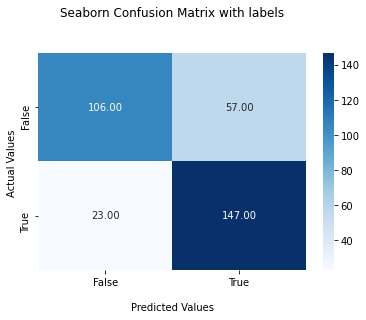

In [ ]:
# Plotting the confusion matrix for the baseline svm model

ax = sns.heatmap(cm_svm_final, annot=True, cmap='Blues', fmt = '.2f')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Reference : https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

ROC AUC=0.81


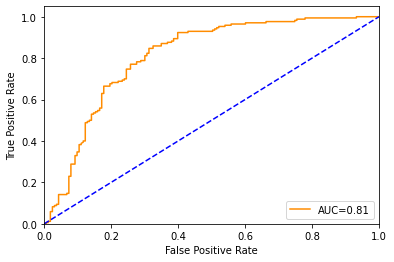

In [ ]:
probs_svm=classifier_final.decision_function(X_test) 
def plot_roc(y_test,probs):
    fpr,tpr,threshold=roc_curve(y_test,probs)
    roc_auc=auc(fpr,tpr)
    print('ROC AUC=%0.2f'%roc_auc)
    plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc,color='darkorange')
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'b--')
    plt.xlim([0,1])
    plt.ylim([0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
plot_roc(y_test,probs_svm)

# Reference : https://github.com/vappiah/Machine-Learning-Tutorials/blob/main/notebooks/ROC%20Curves-Binary%20Classification.ipynb

In [ ]:
X_sm = X.astype(np.float32)
y_sm = y.astype(np.int64)

In [ ]:
# resplitting the data

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, train_size = 0.8, random_state=0)

# Reference : https://www.geeksforgeeks.org/how-to-split-a-dataset-into-train-and-test-sets-using-python/

In [ ]:
# Tensor Wrapping
X_train = np.array(X_train)
X_train = torch.from_numpy(X_train).float()

# Reference : https://notebooks.githubusercontent.com/view/ipynb?azure_maps_enabled=true&browser=unknown_browser&color_mode=auto&commit=39bf6bf94e1ff25dad1dd9c2f49d126bc32c5b40&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f686f737365696e73686e2f42617369632d4d756c74692d7461736b2d4c6561726e696e672f333962663662663934653166663235646164316464396332663439643132366263333263356234302f4d544c2d5079746f7263682e6970796e62&logged_in=false&nwo=hosseinshn%2FBasic-Multi-task-Learning&path=MTL-Pytorch.ipynb&platform=unknown_platform&repository_id=148686787&repository_type=Repository&version=0

In [ ]:
X_test = np.array(X_test)
X_test = torch.from_numpy(X_test).float()
# Reference : https://notebooks.githubusercontent.com/view/ipynb?azure_maps_enabled=true&browser=unknown_browser&color_mode=auto&commit=39bf6bf94e1ff25dad1dd9c2f49d126bc32c5b40&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f686f737365696e73686e2f42617369632d4d756c74692d7461736b2d4c6561726e696e672f333962663662663934653166663235646164316464396332663439643132366263333263356234302f4d544c2d5079746f7263682e6970796e62&logged_in=false&nwo=hosseinshn%2FBasic-Multi-task-Learning&path=MTL-Pytorch.ipynb&platform=unknown_platform&repository_id=148686787&repository_type=Repository&version=0

In [ ]:
X_train = np.array(X_train)
X_train = torch.from_numpy(X_train).float()
# Reference : https://notebooks.githubusercontent.com/view/ipynb?azure_maps_enabled=true&browser=unknown_browser&color_mode=auto&commit=39bf6bf94e1ff25dad1dd9c2f49d126bc32c5b40&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f686f737365696e73686e2f42617369632d4d756c74692d7461736b2d4c6561726e696e672f333962663662663934653166663235646164316464396332663439643132366263333263356234302f4d544c2d5079746f7263682e6970796e62&logged_in=false&nwo=hosseinshn%2FBasic-Multi-task-Learning&path=MTL-Pytorch.ipynb&platform=unknown_platform&repository_id=148686787&repository_type=Repository&version=0

In [ ]:
X_test = np.array(X_test)
X_test = torch.from_numpy(X_test).float()
# Reference : https://notebooks.githubusercontent.com/view/ipynb?azure_maps_enabled=true&browser=unknown_browser&color_mode=auto&commit=39bf6bf94e1ff25dad1dd9c2f49d126bc32c5b40&device=unknown_device&enc_url=68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f686f737365696e73686e2f42617369632d4d756c74692d7461736b2d4c6561726e696e672f333962663662663934653166663235646164316464396332663439643132366263333263356234302f4d544c2d5079746f7263682e6970796e62&logged_in=false&nwo=hosseinshn%2FBasic-Multi-task-Learning&path=MTL-Pytorch.ipynb&platform=unknown_platform&repository_id=148686787&repository_type=Repository&version=0

In [ ]:
# MLP base model
input_size = X_train.shape[1]
hidden_size = 64
num_classes = 2 
num_epochs = 10
learning_rate = 0.01

class MLP(nn.Module):
    def __init__(self, input_size = input_size, hidden_size = hidden_size, num_classes = num_classes, num_units=10, nonlin=nn.ReLU()):
        super(MLP, self).__init__()
        self.dense0 = nn.Linear(20, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 2)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X


# Reference : https://analyticsindiamag.com/a-beginners-guide-to-skorch-with-code-to-implement-neural-network/

In [ ]:
# Defining the cross entropy loss
criteria = nn.CrossEntropyLoss()

# Reference : https://pythonguides.com/cross-entropy-loss-pytorch/

In [ ]:
# Defining Adam optimizer
optimizer = optim.Adam

# Reference : https://pytorch.org/docs/stable/optim.html

In [ ]:
torch.manual_seed(0) # Reference : https://pytorch.org/docs/stable/generated/torch.manual_seed.html
net = NeuralNetClassifier(
    MLP,
    max_epochs=50,
    lr = 0.001,iterator_train__shuffle=True
)
net.fit(X_train, y_train)

# Reference : https://analyticsindiamag.com/a-beginners-guide-to-skorch-with-code-to-implement-neural-network/
# Reference : https://skorch.readthedocs.io/en/stable/user/neuralnet.html

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.6962       0.5349        1.7048  0.1979
      2        1.9444       0.6326        2.5541  0.0530
      3        1.3908       0.4000        0.9478  0.0620
      4        1.3334       0.4000        0.8386  0.0510
      5        1.1066       0.6326        1.0393  0.0600
      6        0.9822       0.6372        0.9364  0.0600
      7        0.9701       0.3953        0.7601  0.0510
      8        0.9327       0.4000        0.8680  0.0650
      9        0.8248       0.6326        1.0582  0.0650
     10        0.7970       0.4047        0.7605  0.0530
     11        0.8820       0.4326        0.7338  0.0790
     12        0.7250       0.6419        0.6875  0.0610
     13        0.8227       0.4186        0.7660  0.0520
     14        0.7520       0.6419        0.7027  0.0590
     15        0.7684       0.6465        0.6663  0.0570
     16        0.7083       0.4

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP(
    (dense0): Linear(in_features=20, out_features=10, bias=True)
    (nonlin): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (dense1): Linear(in_features=10, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=2, bias=True)
    (softmax): Softmax(dim=-1)
  ),
)

In [ ]:
#Make the prediction
y_pred_mlp = net.predict(X_test)

# Reference : T7 with gaps

In [ ]:
# Print confusion matrix, accuracy and standard deviation
cm_mlp = confusion_matrix(y_test, y_pred_mlp )
print(cm_mlp)

from sklearn.model_selection import cross_val_score
accuracies_mlp = cross_val_score(estimator = net, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies_mlp.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_mlp.std()*100))

# Reference : T7 with gaps

[[51 67]
 [52 98]]
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        4.2917       0.6269        1.7640  0.0580
      2        2.4178       0.3834        1.6198  0.0660
      3        1.7256       0.3938        1.3595  0.0650
      4        1.0862       0.6218        0.8690  0.0580
      5        0.8164       0.6269        1.8834  0.0520
      6        1.1099       0.6269        0.7874  0.0510
      7        0.7288       0.3938        0.7951  0.0600
      8        0.7178       0.6218        0.6654  0.0550
      9        0.6883       0.6373        0.9220  0.0440
     10        0.8010       0.5959        0.6745  0.0530
     11        0.6848       0.5803        0.6805  0.0540
     12        0.6782       0.4197        0.7299  0.0600
     13        0.6876       0.4974        0.7169  0.0550
     14        0.6890       0.5751        0.6801  0.0640
     15        0.6938       0.6477        0.6652  0.0530
     16     

     25        0.6741       0.6218        0.6814  0.0560
     26        0.6743       0.6166        0.6855  0.0540
     27        0.6848       0.6114        0.6774  0.0410
     28        0.6837       0.6166        0.6765  0.0400
     29        0.6731       0.4663        1.4399  0.0450
     30        0.8616       0.6166        0.6821  0.0450
     31        0.6810       0.6114        0.6766  0.0510
     32        0.6673       0.6114        0.6768  0.0440
     33        0.6777       0.6062        0.6903  0.0580
     34        0.6822       0.6010        0.6773  0.0450
     35        0.6748       0.6010        0.6796  0.0480
     36        0.6742       0.5026        0.6952  0.0450
     37        0.6857       0.6010        0.6775  0.0630
     38        0.6803       0.6010        0.6834  0.0580
     39        0.6751       0.6062        0.6740  0.0750
     40        0.6642       0.6321        0.6781  0.0879
     41        0.6734       0.6218        0.6759  0.0830
     42        0.6725       0.6

      3        1.2309       0.4249        1.2672  0.0650
      4        1.0599       0.3834        1.5264  0.0560
      5        1.0817       0.5389        0.7233  0.0610
      6        0.8303       0.6114        0.6747  0.0570
      7        0.8082       0.6373        0.8687  0.0530
      8        0.7643       0.5699        0.6751  0.0480
      9        0.7548       0.6373        0.6822  0.0500
     10        0.6749       0.6373        0.7196  0.0490
     11        0.6902       0.3938        0.8002  0.0610
     12        0.7121       0.5440        0.7146  0.0550
     13        0.6816       0.5026        0.7088  0.0500
     14        0.6868       0.6373        0.6900  0.0650
     15        0.6824       0.5181        0.6966  0.0680
     16        0.6694       0.4456        0.7900  0.0650
     17        0.7124       0.6373        0.6903  0.0650
     18        0.6675       0.6373        0.6824  0.0640
     19        0.6767       0.6373        0.6641  0.0540
     20        0.6622       0.5

     29        0.6615       0.6373        0.6461  0.0580
     30        0.6548       0.6373        0.6479  0.0510
     31        0.6677       0.6373        0.6418  0.0610
     32        0.6635       0.6736        0.6710  0.0450
     33        0.6624       0.6477        0.6566  0.0550
     34        0.6611       0.3782        0.7369  0.0600
     35        0.6799       0.6425        0.6648  0.0460
     36        0.6611       0.6373        0.6411  0.0510
     37        0.6561       0.6736        0.6671  0.0470
     38        0.6641       0.5803        0.6781  0.0470
     39        0.6725       0.6373        0.6543  0.0530
     40        0.6559       0.6373        0.6366  0.0540
     41        0.6563       0.5751        0.6780  0.0520
     42        0.6592       0.6373        0.6377  0.0460
     43        0.6565       0.6788        0.6684  0.0500
     44        0.6664       0.6788        0.6675  0.0490
     45        0.6584       0.5699        0.6843  0.0710
     46        0.6608       0.6

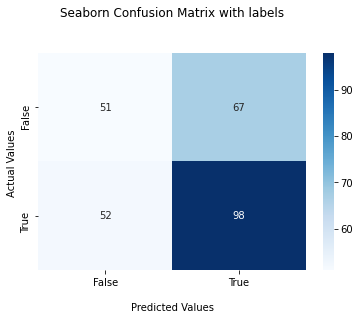

In [ ]:
# Plotting the confusion matrix for the baseline mlp model

ax = sns.heatmap(cm_mlp, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Reference : https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [ ]:
# Print classification report of baseline Mlp model
print(classification_report(y_test, y_pred_mlp))

              precision    recall  f1-score   support

           0       0.50      0.43      0.46       118
           1       0.59      0.65      0.62       150

    accuracy                           0.56       268
   macro avg       0.54      0.54      0.54       268
weighted avg       0.55      0.56      0.55       268



In [ ]:
# grid search for mlp
from sklearn.model_selection import GridSearchCV
params = {
    'lr': [0.01, 0.001,0.1],
    'max_epochs': [10, 20,30],
    'module__num_units': [10, 20],
}
grid_search = GridSearchCV(net, params, refit=True, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)
print(grid_search.best_score_, grid_search.best_params_)

# Reference : https://skorch.readthedocs.io/en/stable/user/quickstart.html

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        4.4833       0.3636        7.7667  0.0560
      2        4.0477       0.3706        0.7389  0.0470
      3        0.7418       0.3636        0.7658  0.0470
      4        0.7303       0.4825        0.7000  0.0470
      5        0.7003       0.5455        0.6839  0.0360
      6        0.6994       0.5594        0.6838  0.0400
      7        0.6895       0.4825        0.7056  0.0370
      8        0.7368       0.4196        0.7119  0.0480
      9        0.7120       0.5175        0.6969  0.0410
     10        0.7193       0.5245        0.6960  0.0550
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9555       0.6084        0.7150  0.0460
      2        0.6813       0.6154        0.7001  0.0340
      3        0.6688       0.6154        0.6906  0.0730
      4        0.6781       0.6

      2        0.6915       0.5874        0.6704  0.0380
      3        0.6819       0.6364        0.6729  0.0370
      4        0.6891       0.6364        0.6581  0.0550
      5        0.6754       0.6364        0.6523  0.0330
      6        0.6604       0.6364        0.6508  0.0380
      7        0.6618       0.6364        0.6458  0.0430
      8        0.6615       0.6364        0.6608  0.0400
      9        0.6803       0.6364        0.6492  0.0470
     10        0.6748       0.6364        0.6493  0.0650
     11        0.6564       0.6364        0.6662  0.0750
     12        0.6475       0.6364        0.6579  0.0610
     13        0.6723       0.6364        0.6482  0.0580
     14        0.6500       0.6364        0.6436  0.0530
     15        0.6663       0.6364        0.6572  0.0420
     16        0.6490       0.6364        0.6706  0.0430
     17        0.6673       0.6364        0.6544  0.0440
     18        0.6644       0.6364        0.6653  0.0660
     19        0.6570       0.6

     13        0.7311       0.6434        0.6303  0.0430
     14        0.6706       0.4196        0.7190  0.0390
     15        0.7210       0.6853        0.6533  0.0360
     16        0.7154       0.7063        0.6608  0.0400
     17        0.6834       0.6853        0.6486  0.0510
     18        0.6897       0.4056        0.7162  0.0410
     19        0.7207       0.6643        0.6309  0.0390
     20        0.6683       0.5105        0.6908  0.0440
     21        0.7003       0.6364        0.6322  0.0530
     22        0.6691       0.3497        0.7343  0.0460
     23        0.7246       0.3706        0.7252  0.0430
     24        0.7236       0.3916        0.7164  0.0640
     25        0.7154       0.3916        0.7089  0.0660
     26        0.7111       0.4056        0.7007  0.0830
     27        0.7081       0.4266        0.6950  0.0750
     28        0.7077       0.4755        0.6866  0.0790
     29        0.6986       0.5594        0.6738  0.0750
     30        0.6965       0.5

     13        0.7080       0.4196        0.6994  0.0420
     14        0.7112       0.4196        0.6963  0.0520
     15        0.6929       0.4196        0.6955  0.0420
     16        0.6972       0.4196        0.6946  0.0400
     17        0.7007       0.4196        0.6915  0.0450
     18        0.6935       0.4476        0.6900  0.0420
     19        0.6892       0.6434        0.6873  0.0480
     20        0.6868       0.6364        0.6768  0.0390
     21        0.6647       0.6364        0.6611  0.0410
     22        0.6595       0.6364        0.6594  0.0410
     23        0.6884       0.6294        0.6793  0.0380
     24        0.6766       0.6294        0.6680  0.0380
     25        0.6707       0.6294        0.6735  0.0430
     26        0.6730       0.6434        0.6617  0.0430
     27        0.6613       0.6364        0.6787  0.0470
     28        0.6793       0.6364        0.6574  0.0420
     29        0.6557       0.6364        0.6520  0.0440
     30        0.6696       0.6

      8        0.7201       0.6084        0.6777  0.0450
      9        0.6900       0.6434        0.6716  0.0460
     10        0.7005       0.4056        0.6886  0.0400
     11        0.6884       0.4895        0.6809  0.0420
     12        0.6811       0.6364        0.6676  0.0390
     13        0.6758       0.6364        0.6735  0.0360
     14        0.6942       0.6993        0.6750  0.0400
     15        0.7008       0.6364        0.6699  0.0420
     16        0.6728       0.6294        0.6716  0.0430
     17        0.6752       0.6364        0.6694  0.0380
     18        0.6766       0.6364        0.6709  0.0440
     19        0.6683       0.6364        0.6692  0.0390
     20        0.6632       0.6364        0.6719  0.0450
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        7.5006       0.3636        8.9066  0.0360
      2        7.4519       0.3636        8.4392  0.0360
      3        6.4885       0.3

     19        0.6888       0.6294        0.6760  0.0500
     20        0.6959       0.6294        0.6777  0.0390
     21        0.6972       0.6294        0.6738  0.0370
     22        0.6940       0.6294        0.6737  0.0380
     23        0.7106       0.6294        0.6757  0.0450
     24        0.6798       0.6294        0.6830  0.0330
     25        0.7123       0.6294        0.6740  0.0430
     26        0.6929       0.6294        0.6728  0.0420
     27        0.6832       0.4336        0.7450  0.0400
     28        0.7414       0.6224        0.6724  0.0400
     29        0.6680       0.6224        0.6724  0.0370
     30        0.6974       0.6224        0.6807  0.0390
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.6987       0.6364        3.8340  0.0330
      2        2.8169       0.6364        2.5633  0.0420
      3        2.2122       0.6014        0.8242  0.0450
      4        1.1340       0.6

     18        0.7508       0.6294        0.9428  0.0500
     19        0.7599       0.7133        0.6501  0.0500
     20        0.7279       0.4825        0.7157  0.0350
     21        0.7510       0.6294        0.6910  0.0410
     22        0.6767       0.6294        0.6927  0.0470
     23        0.6664       0.6643        0.6611  0.0440
     24        0.6870       0.6783        0.6566  0.0370
     25        0.6734       0.6224        0.6813  0.0370
     26        0.6766       0.6294        0.7124  0.0410
     27        0.6696       0.6294        0.6629  0.0400
     28        0.6904       0.6503        0.6402  0.0460
     29        0.6719       0.7203        0.6388  0.0530
     30        0.6878       0.6224        0.6505  0.0410
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        4.8477       0.6364        1.0159  0.0450
      2        3.2309       0.5385        0.8286  0.0400
      3        2.3443       0.5

     11        3.3367       0.6364        5.7347  0.0450
     12        3.1355       0.6364        5.7347  0.0460
     13        3.6269       0.6364        5.7350  0.0380
     14        3.1295       0.6364        5.7349  0.0450
     15        3.1157       0.6364        5.7347  0.0400
     16        3.2099       0.6364        5.7347  0.0430
     17        3.4519       0.6364        5.7349  0.0390
     18        3.3314       0.6364        5.7348  0.0400
     19        3.3035       0.6364        5.7349  0.0390
     20        3.2124       0.6364        5.7350  0.0400
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.4540       0.6364        0.6497  0.0330
      2        0.6603       0.6364        0.6528  0.0390
      3        0.6584       0.6364        0.6508  0.0430
      4        0.6608       0.6364        0.6542  0.0410
      5        0.6564       0.6364        0.6543  0.0460
      6        0.6564       0.6

      9        0.6563       0.6364        0.6558  0.0480
     10        0.6564       0.6364        0.6556  0.0430
     11        0.6564       0.6364        0.6555  0.0360
     12        0.6560       0.6364        0.6555  0.0410
     13        0.6560       0.6364        0.6555  0.0400
     14        0.6560       0.6364        0.6555  0.0390
     15        0.6563       0.6364        0.6556  0.0390
     16        0.6562       0.6364        0.6556  0.0440
     17        0.6559       0.6364        0.6556  0.0470
     18        0.6561       0.6364        0.6555  0.0510
     19        0.6564       0.6364        0.6555  0.0460
     20        0.6560       0.6364        0.6555  0.0390
     21        0.6558       0.6364        0.6555  0.0440
     22        0.6560       0.6364        0.6555  0.0390
     23        0.6559       0.6364        0.6555  0.0490
     24        0.6566       0.6364        0.6555  0.0410
     25        0.6559       0.6364        0.6555  0.0380
     26        0.6560       0.6

     15        3.0721       0.6364        5.7972  0.0430
     16        3.1452       0.6364        5.7972  0.0380
     17        2.9729       0.6364        5.7972  0.0440
     18        3.3345       0.6364        5.7972  0.0340
     19        3.0398       0.6364        5.7972  0.0420
     20        3.1730       0.6364        5.7972  0.0380
     21        3.2030       0.6364        5.7972  0.0410
     22        2.9741       0.6364        5.7972  0.0460
     23        3.0958       0.6364        5.7972  0.0470
     24        3.2589       0.6364        5.7972  0.0460
     25        2.8170       0.6364        5.7972  0.0380
     26        2.9745       0.6364        5.7972  0.0420
     27        2.8365       0.6364        5.7972  0.0390
     28        3.5256       0.6364        5.7972  0.0380
     29        3.1051       0.6364        5.7972  0.0390
     30        3.1243       0.6364        5.7972  0.0400
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  --------

In [ ]:
# MLP base model
input_size = X_train.shape[1]
hidden_size = 100
num_classes = 2 
num_epochs = 30
learning_rate = 0.01

class MLP_final(nn.Module):
    def __init__(self, input_size = input_size, hidden_size = hidden_size, num_classes = num_classes, num_units=10, nonlin=nn.ReLU()):
        super(MLP_final, self).__init__()
        self.dense0 = nn.Linear(20, num_units)
        self.nonlin = nonlin
        self.dropout = nn.Dropout(0.5)
        self.dense1 = nn.Linear(num_units, num_units)
        self.output = nn.Linear(num_units, 2)
        self.softmax = nn.Softmax(dim=-1)

    def forward(self, X, **kwargs):
        X = self.nonlin(self.dense0(X))
        X = self.dropout(X)
        X = self.nonlin(self.dense1(X))
        X = self.softmax(self.output(X))
        return X


# Reference : https://analyticsindiamag.com/a-beginners-guide-to-skorch-with-code-to-implement-neural-network/

In [ ]:
torch.manual_seed(0) # Reference : https://pytorch.org/docs/stable/generated/torch.manual_seed.html
net = NeuralNetClassifier(
    MLP_final,
    max_epochs= 30,
    lr = 0.01, 
    iterator_train__shuffle = True
)
net.fit(X_train, y_train)

# Reference : https://analyticsindiamag.com/a-beginners-guide-to-skorch-with-code-to-implement-neural-network/
# Reference : https://skorch.readthedocs.io/en/stable/user/neuralnet.html

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.9293       0.3907        0.7118  0.0810
      2        0.7090       0.3814        0.7031  0.0750
      3        0.6980       0.6047        0.6970  0.0780
      4        0.7017       0.6279        0.6901  0.0760
      5        0.6914       0.6372        0.6825  0.0790
      6        0.6886       0.6372        0.6767  0.0770
      7        0.6749       0.6419        0.7076  0.0800
      8        0.7082       0.6372        0.6789  0.0710
      9        0.6779       0.6372        0.6772  0.0790
     10        0.6775       0.6372        0.6749  0.0720
     11        0.6802       0.6372        0.6726  0.0770
     12        0.6731       0.6372        0.6712  0.0670
     13        0.6718       0.6372        0.6699  0.0780
     14        0.6783       0.6372        0.6679  0.0820
     15        0.6721       0.6372        0.6669  0.0750
     16        0.6716       0.6

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MLP_final(
    (dense0): Linear(in_features=20, out_features=10, bias=True)
    (nonlin): ReLU()
    (dropout): Dropout(p=0.5, inplace=False)
    (dense1): Linear(in_features=10, out_features=10, bias=True)
    (output): Linear(in_features=10, out_features=2, bias=True)
    (softmax): Softmax(dim=-1)
  ),
)

In [ ]:
#Make the prediction
y_pred_mlp_final = net.predict(X_test)

# Reference : T7 with gaps

In [ ]:
# Print confusion matrix, accuracy and standard deviation
cm_mlp_final = confusion_matrix(y_test, y_pred_mlp_final )
print(cm_mlp_final)

from sklearn.model_selection import cross_val_score
accuracies_mlp_final = cross_val_score(estimator = net, X = X_train, y = y_train, cv = 10)

print("Accuracy: {:.2f} %".format(accuracies_mlp_final.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies_mlp_final.std()*100))

# Reference : T7 with gaps

[[  1 117]
 [  0 150]]
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        3.2111       0.6114        0.6647  0.0690
      2        0.7630       0.6062        0.6647  0.0530
      3        0.7073       0.3627        0.7573  0.0500
      4        0.7375       0.6321        0.7112  0.0510
      5        0.8268       0.3627        0.7570  0.0600
      6        0.7389       0.3627        0.7414  0.0490
      7        0.7539       0.5389        0.6899  0.0530
      8        0.7173       0.6062        0.6652  0.0480
      9        0.7393       0.3679        0.7682  0.0500
     10        0.7628       0.3679        0.7539  0.0570
     11        0.7475       0.3679        0.7367  0.0560
     12        0.7164       0.6425        0.6797  0.0530
     13        0.6849       0.6477        0.6512  0.0610
     14        0.6951       0.6425        0.6722  0.0630
     15        0.6867       0.6477        0.6464  0.0690
     16 

      1        4.1024       0.6373        3.7755  0.0530
      2        2.3877       0.3679        0.7365  0.0610
      3        0.7186       0.4508        0.7016  0.0460
      4        0.7111       0.4767        0.6953  0.0530
      5        0.7088       0.4456        0.6984  0.0500
      6        0.7018       0.3731        0.7127  0.0450
      7        0.7012       0.6736        0.6537  0.0490
      8        0.7390       0.3679        0.7352  0.0500
      9        0.7305       0.3679        0.7081  0.0490
     10        0.7015       0.3782        0.7025  0.0500
     11        0.7032       0.3627        0.6970  0.0690
     12        0.6959       0.3886        0.6921  0.0800
     13        0.6907       0.6062        0.6879  0.1049
     14        0.6905       0.6166        0.6858  0.1209
     15        0.6852       0.6114        0.6842  0.0580
     16        0.6815       0.6269        0.6815  0.0470
     17        0.6800       0.6373        0.6800  0.0620
     18        0.6828       0.6

      2        2.8205       0.6321        0.6774  0.0560
      3        0.6957       0.6373        0.8689  0.0440
      4        0.6974       0.6114        0.6813  0.0490
      5        0.6735       0.6373        0.6792  0.0540
      6        0.6747       0.6321        0.6764  0.0460
      7        0.6718       0.6373        0.6744  0.0520
      8        0.6696       0.6373        0.6707  0.0480
      9        0.6675       0.6373        0.6684  0.0460
     10        0.6675       0.6373        0.6537  0.0490
     11        0.6668       0.6373        0.6539  0.0500
     12        0.6618       0.6373        0.7255  0.0520
     13        0.6732       0.6373        0.7908  0.0520
     14        0.6889       0.6373        0.6652  0.0520
     15        0.6620       0.6373        0.6574  0.0560
     16        0.6510       0.6373        0.6642  0.0740
     17        0.6655       0.6373        0.6622  0.0570
     18        0.6618       0.6373        0.6617  0.0510
     19        0.6613       0.6

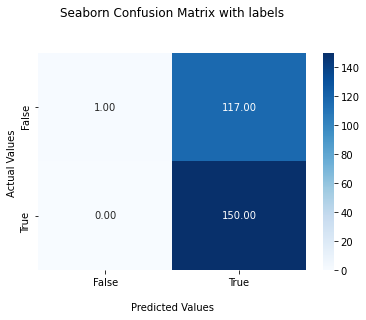

In [ ]:
# Plotting the confusion matrix for the baseline mlp model

ax = sns.heatmap(cm_mlp_final, annot=True, cmap='Blues', fmt = '.2f')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# Reference : https://www.stackvidhya.com/plot-confusion-matrix-in-python-and-why/

In [ ]:
# Print classification report of baseline MLP model
print(classification_report(y_test, y_pred_mlp_final))

              precision    recall  f1-score   support

           0       1.00      0.01      0.02       118
           1       0.56      1.00      0.72       150

    accuracy                           0.56       268
   macro avg       0.78      0.50      0.37       268
weighted avg       0.75      0.56      0.41       268



In [ ]:
from platform import python_version
python_version()


'3.8.8'